In [37]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
def apply_averaging_filter(arr, filter_range):
    filtered_arr = []
    for i in range(len(arr)):
        if i == 0:
            filtered_arr.append(arr[0])
        else:
            start_index = max(0, i - filter_range + 1)
            end_index = i + 1
            filtered_value = sum(arr[start_index:end_index]) / (end_index - start_index)
            filtered_arr.append(filtered_value)
    return filtered_arr

In [77]:
rates = ['8e-7', '7e-6', '1e-5']
absolute_path = '../ls_outputs/rate/ls_tuning_rate_'
extensions = ['2000_8e-7.csv', '4000_7e-6.csv', '6000_1e-5.csv']
cosine_extensions = ['2000_cosine_8e-7.csv', '4000_cosine_7e-6.csv', '6000_cosine_1e-5.csv']
num_iters = 10000
filter_size = 1000
errors = np.zeros((3, num_iters))
errors_cosine = np.zeros((3, num_iters))
avg_errors = np.zeros((3, num_iters))
avg_errors_cosine = np.zeros((3, num_iters))
for i in range(3):
    errors[i] = pd.read_csv(absolute_path + extensions[i])["errors"]
    errors_cosine[i] = pd.read_csv(absolute_path + cosine_extensions[i])["errors"]
    avg_errors[i] = apply_averaging_filter(pd.read_csv(absolute_path + extensions[i])["errors"], filter_size)
    avg_errors_cosine[i] = apply_averaging_filter(pd.read_csv(absolute_path + cosine_extensions[i])["errors"], filter_size)

In [98]:
nesterov_path = '../ls_outputs/nesterov/ls_tuning_nesterov_0'
nesterov_values = ['5', '75', '9', '99']
nesterov_errors = np.zeros(len(nesterov_values))
for i, v in enumerate(nesterov_values):
    nesterov_errors[i] = apply_averaging_filter(pd.read_csv(f"{nesterov_path + v}.csv")["errors"].to_numpy(), 50)[-1]

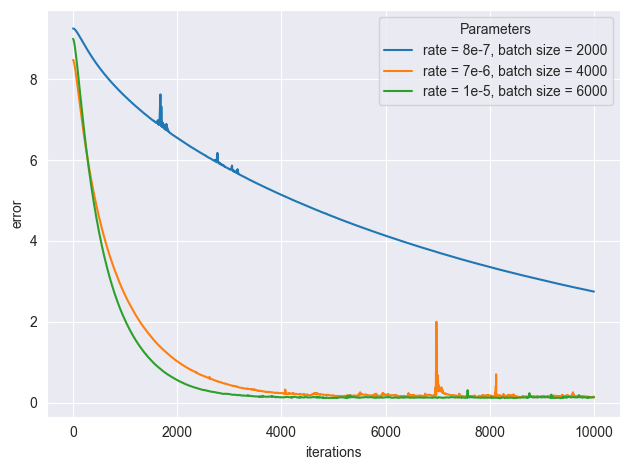

In [70]:
fig, ax = plt.subplots()
sns.set_style('darkgrid')
data = pd.DataFrame({
    "rate = 8e-7, batch size = 2000" : errors[0],
    "rate = 7e-6, batch size = 4000" : errors[1],
    "rate = 1e-5, batch size = 6000" : errors[2],
    "iterations" : np.linspace(0, 10000, 10000)
    })
data_cosine = pd.DataFrame({
    "rate = 8e-7, batch size = 2000" : errors_cosine[0],
    "rate = 7e-6, batch size = 4000" : errors_cosine[1],
    "rate = 1e-5, batch size = 6000" : errors_cosine[2],
    "iterations" : np.linspace(0, 10000, 10000)
    })
sns.lineplot(x='iterations', y='error', hue='Parameters', data=pd.melt(data, ['iterations'], value_name='error', var_name='Parameters'))
plt.show()

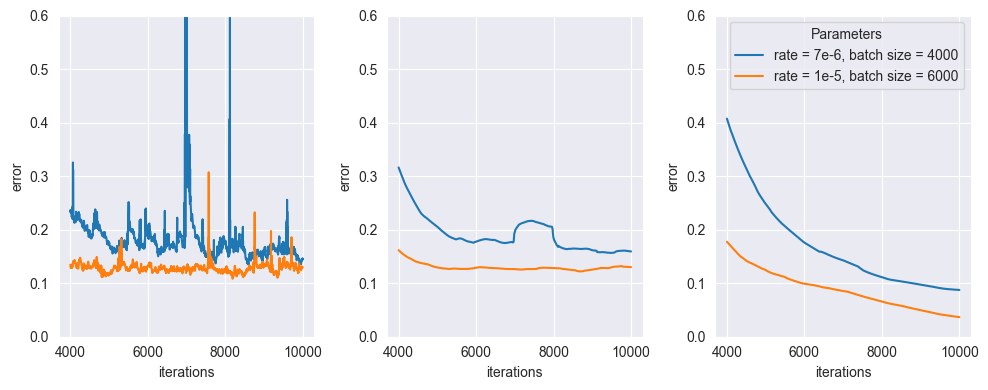

In [94]:
fig, ax = plt.subplots(1, 3)
data = pd.DataFrame({
    "rate = 7e-6, batch size = 4000" : errors[1][4000:10000],
    "rate = 1e-5, batch size = 6000" : errors[2][4000:10000],
    "iterations" : np.linspace(4000, 10000, 6000)
    })
data_avg = pd.DataFrame({
    "rate = 7e-6, batch size = 4000" : avg_errors[1][4000:10000],
    "rate = 1e-5, batch size = 6000" : avg_errors[2][4000:10000],
    "iterations" : np.linspace(4000, 10000, 6000)
    })
data_avg_cosine = pd.DataFrame({
    "rate = 7e-6, batch size = 4000" : avg_errors_cosine[1][4000:10000],
    "rate = 1e-5, batch size = 6000" : avg_errors_cosine[2][4000:10000],
    "iterations" : np.linspace(4000, 10000, 6000)
    })
plt1 = sns.lineplot(x='iterations', y='error', hue='Parameters', data=pd.melt(data, ['iterations'], value_name='error', var_name='Parameters'), ax=ax[0],legend=None)
sns.lineplot(x='iterations', y='error', hue='Parameters', data=pd.melt(data_avg, ['iterations'], value_name='error', var_name='Parameters'), ax=ax[1],legend=None)
sns.lineplot(x='iterations', y='error', hue='Parameters', data=pd.melt(data_avg_cosine, ['iterations'], value_name='error', var_name='Parameters'), ax=ax[2])
ax[0].set_ylim(0,0.6)
ax[1].set_ylim(0,0.6)
ax[2].set_ylim(0,0.6)
fig.set_figwidth(10)
fig.set_figheight(4)
plt.show()

In [ ]:
fig, ax = plt.subplots()
data = pd.DataFrame({
    "rate = 7e-6, batch size = 4000" : errors[1][4000:10000],
    "rate = 1e-5, batch size = 6000" : errors[2][4000:10000],
    "iterations" : np.linspace(4000, 10000, 6000)
    })
sns.lineplot(x='iterations', y='error', hue='Parameters', data=pd.melt(data, ['iterations'], value_name='error', var_name='Parameters'))
ax.set_ylim(0,0.6)
plt.show()

<Axes: xlabel='alpha', ylabel='errors'>

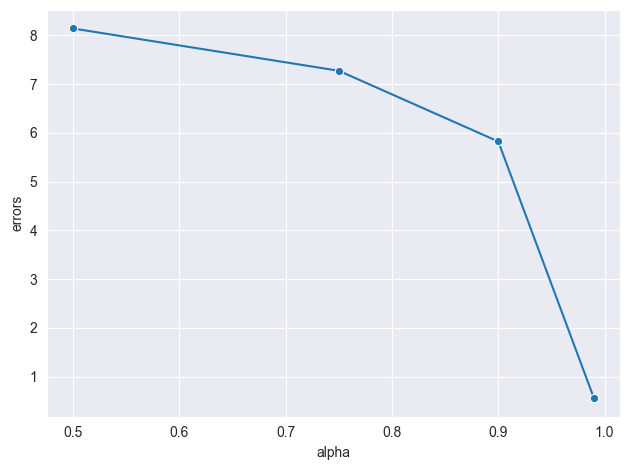

In [106]:
data = pd.DataFrame({
    "errors" : nesterov_errors,
    "alpha" : [int(s) / 10**len(s) for s in nesterov_values]
})
sns.lineplot(data=data, y="errors", x="alpha", marker='o')